<a href="https://colab.research.google.com/github/choinkyo/Machine-Learning-and-Predictive-Modeling/blob/master/Machine_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML Model with Linear Regression, Logistic Regression and Decision Tree

In this lab, we will go through how to use scikit-learn to build ML models, including linear regression, logistic regression, and decision tree. Also, we will cover how to use grid search and k-fold cross validation to find the best hyper-parameters for each model. 

In [1]:
# importing libraries
import os
import io
import warnings

import numpy as np
import scipy as sp
import pandas as pd
import sklearn as sk

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline
import seaborn as sns
sns.set()

# evaluation metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

# grid search for model selection
from sklearn.model_selection import GridSearchCV

# linear regression
from sklearn.linear_model import LinearRegression

# logistic regression
from sklearn.linear_model import LogisticRegression

# decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

warnings.simplefilter(action='ignore', category=FutureWarning)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Linear Regression 

Linear Regression (LR) fits a linear model with coefficients w = (w1, …, wp) to minimize the residual sum of squares between the observed targets in the dataset, and the targets predicted by the linear approximation. For example, a modeler might want to relate the weights of individuals to their heights using a linear regression model.

### Load and visualize the data

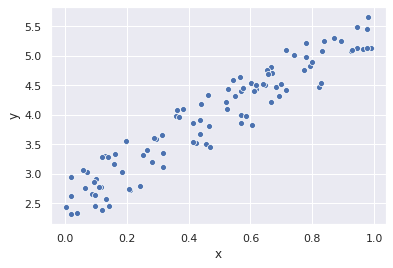

In [2]:
# load data 
data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/linear_regression_data.csv')

# visualize
sns.scatterplot(data.x, data.y)

### Train linear regression model

Now try to train a linear regression to predict y using x, and print the coefficients of the linear model. [Hint: please refer to this [API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) to learn how to train a linear regression model using sklearn. ]

In [3]:
# TODO: Train linear regression model

# model initialization
linear_regression_model = LinearRegression()

# fit the data(train the model)
linear_regression_model.fit(data.loc[:, ['x']], data['y'])

# print values
print('Slope: {}'.format(linear_regression_model.coef_))
print('Intercept: {}'.format(linear_regression_model.intercept_))

Slope: [2.93655106]
Intercept: 2.5580800241570225


### Visualize the linear regression model

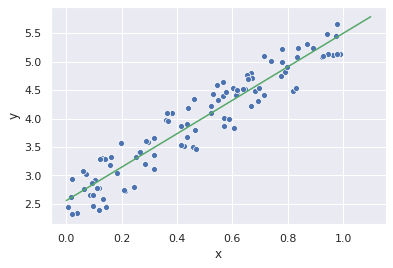

In [4]:
# visualize the linear model
x_plot = np.linspace(0, 1.1, 100)
y_plot = linear_regression_model.coef_[0] * x_plot + linear_regression_model.intercept_
sns.lineplot(x_plot, y_plot, color='g')
sns.scatterplot(data.x, data.y)

### Predict with a linear regression model

Now we have a linear regression model trained. We would like to evaluate its performance and also use it to predict on new data points. Please refer to this [API](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict) to make prediction with the model you just trained.

In [5]:
# TODO: Predict with a linear regression model

# predict
z = linear_regression_model.predict(data.loc[:, ['x']])
y = data['y']

### Evaluate the model performance on the training set

Mean Squared Error (MSE) is the average of the sum of the squares of residuals, which is defined by

\begin{align}
MSE = \frac{1}{N}\sum_{i=1}^N(y_i - z_i)^2
\end{align}

$R^2$ score or the coefficient of determination explains how much the total variance of the dependent variable can be reduced by using the linear regression. $R^2$ is determined by

\begin{align}
R^2 = 1 - \frac{SS_r}{SS_t}
\end{align}

where $SS_r = \sum_{i=1}^N (y_i - \bar{y})^2$ is the total sum of errors if we take the mean of the observed values as the predicted value and $SS_r = \sum_{i=1}^N (y_i - z_i)^2$ is the sum of square of residuals.

#### Model Evaluation

Define two functions in python: one for MSE and one for $R^2$.

In [6]:
# TODO: code up RMSE and R2 
def mse(y, z):
    return np.mean((y - z)**2)
    
def r2(y, z):
    ssr = np.sum((y - z)**2)
    sst = np.sum((y - np.mean(y))**2)
    return 1 - (ssr / sst)
    
print('mean squared error: {}'.format(mse(y, z)))
print('R2 score: {}'.format(r2(y, z)))

mean squared error: 0.07623324582875007
R2 score: 0.9038655568672764


In [7]:
# use scikit learn's implementation
mse = mean_squared_error(y, z)
r2 = r2_score(y, z)

print('mean squared error: {}'.format(mse))
print('R2 score: {}'.format(r2))

mean squared error: 0.07623324582875009
R2 score: 0.9038655568672764


---

## Build ML model onHalf Moon Dataset

### Load and visualize the data

Half moon dataset is a synthetic dataset which we use to demonstrate building various ML models.



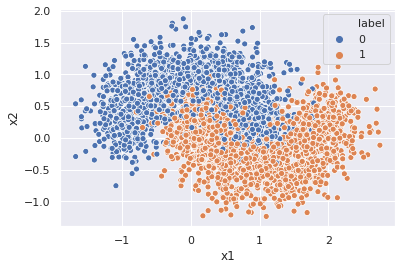

In [8]:
train_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/halfmoon_train.csv')
train_x = train_data.loc[:,['x1', 'x2']]
train_y = train_data.loc[:,'label']

# visualize
sns.scatterplot(train_data.x1, train_data.x2, hue=train_data.label)

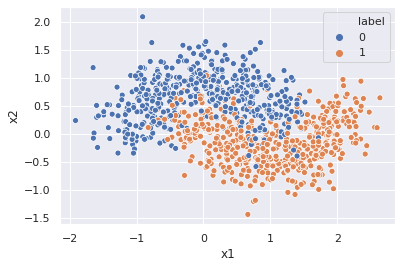

In [9]:
test_data = pd.read_csv('https://raw.githubusercontent.com/zariable/data/master/halfmoon_test.csv')
test_x = test_data.loc[:,['x1', 'x2']]
test_y = test_data.loc[:,'label']

# visualize
sns.scatterplot(test_data.x1, test_data.x2, hue=test_data.label)

---

## Logistic Regression

### Train Logistic Regression Model
In this exercise, we will use [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) API in scikit-learn to train a logistic regression model. Please checkout its documentation on how to construct a Logistic Regression model.

In [10]:
# TODO: bulid logistic regression model

# model initialization
logistic_regression_model = LogisticRegression()

# train the model
logistic_regression_model.fit(train_data.loc[:, ['x1', 'x2']], train_data['label'])

# print model parameters
print('Slope: {}'.format(logistic_regression_model.coef_))
print('Intercept: {}'.format(logistic_regression_model.intercept_))

Slope: [[ 1.27833067 -3.68269452]]
Intercept: [0.2968678]


### Visualize the decision boundary

In a statistical-classification problem with two classes, a decision boundary or decision surface is a hypersurface that partitions the underlying vector space into two sets, one for each class. The classifier will classify all the points on one side of the decision boundary as belonging to one class and all those on the other side as belonging to the other class. 

In [11]:
# helper functions used to plot decision boundary
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    """
    Plot the decision boundary of a learnt classifier
    """
    if isinstance(X, pd.DataFrame):
        X = X.values
    if isinstance(y, pd.Series):
        y = y.values
    
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=1)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

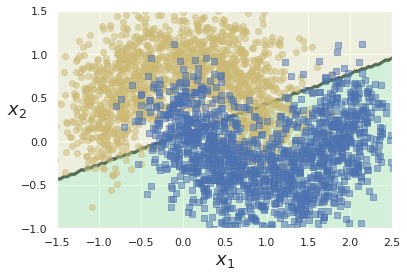

In [12]:
# visualize the linear model
plot_decision_boundary(logistic_regression_model, train_x, train_y)

### Predict with LR model

Try to use the model you just trained to make predictions on the training data as well as the test data for evaluation using [predict](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict) API.

In [13]:
#  TODO: use the RL model and make predictions on the training data as well as the test data

train_z = logistic_regression_model.predict(train_x)
test_z = logistic_regression_model.predict(test_x)

### Evaluate LR model
Now we evaluate the model performance on test data

In [14]:
print("model accuracy on train set: {}".format(accuracy_score(train_y, train_z)))
print("model accuracy on test set: {}".format(accuracy_score(test_y, test_z)))

model accuracy on train set: 0.8463333333333334
model accuracy on test set: 0.84


---

## Decision Tree (DT)

### Train DT model

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

Please refer to this [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) API to learn how to train a decision tree model. To start with, you can choose the tree depth to be 2. You can come back later and play around with other parameter settings to see if you can further improve the model performance. 

In [15]:
# model initialization
dt_model = DecisionTreeClassifier(max_depth=2)

# train the model
dt_model.fit(train_x, train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Visualize the decision boundary

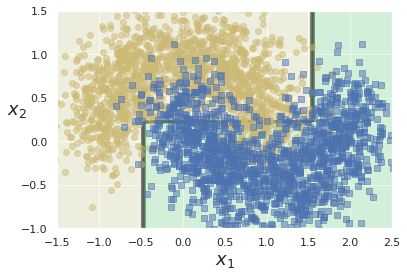

In [16]:
plot_decision_boundary(dt_model, train_x, train_y)

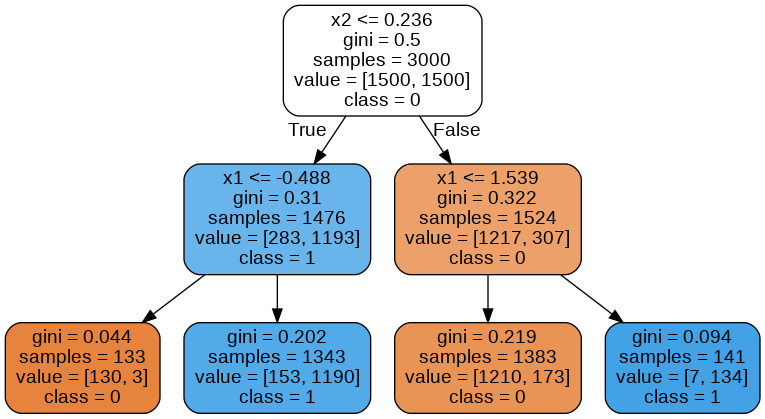

In [17]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
feature_names = train_x.columns
class_names = train_y.unique().astype('U')
class_names.sort()
export_graphviz(dt_model, out_file=dot_data, feature_names=feature_names, class_names=class_names, filled=True, rounded=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

### Predict with DT model

Now we can make predictions using the decision tree model we just learned. With decision tree model, you can output the predicted class as well as its likelihood/probability with [predict](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict) and [predict_proba](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.predict_proba) respectively.

In [18]:
# TODO: use the decision model to make predictions. You can output both the predicted class as well as its likelihood.

train_z = dt_model.predict(train_x)
train_z_prob = dt_model.predict_proba(train_x)[:,1]

test_z = dt_model.predict(test_x)
test_z_prob = dt_model.predict_proba(test_x)[:,1]

### Evaluate DT model

In [19]:
print("model accuracy on train set: {}".format(accuracy_score(train_y, train_z)))
print("model ROC AUC on test set: {}".format(roc_auc_score(train_y, train_z_prob)))
print("model accuracy on test set: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC on test set: {}".format(roc_auc_score(test_y, test_z_prob)))

model accuracy on train set: 0.888
model ROC AUC on test set: 0.8948959999999999
model accuracy on test set: 0.892
model ROC AUC on test set: 0.8990000000000001


### Hyper-parameter tuning

Finally we try decision tree models with different hyper-parameter settings and find the best setting using k-fold cross-validation. You will need [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for this task.

In [20]:
# TODO: find the best hyper-parameters with grid search using k-fold cross-validation

parameters = {
    "max_depth": [2, 3, 4], 
    "min_samples_split": [0.05, 0.1, 0.2]
}

dtc = DecisionTreeClassifier()
dtc_grid = GridSearchCV(dtc, parameters, cv=3)
dtc_grid.fit(train_x, train_y)

# summarize the results of the grid search
print("The best score is {}".format(dtc_grid.best_score_))
print("The best hyper parameter setting is {}".format(dtc_grid.best_params_))

The best score is 0.8853333333333334
The best hyper parameter setting is {'max_depth': 2, 'min_samples_split': 0.05}


In [21]:
train_z = dtc_grid.predict(train_x)
train_z_prob = dtc_grid.predict_proba(train_x)[:,1]

test_z = dtc_grid.predict(test_x)
test_z_prob = dtc_grid.predict_proba(test_x)[:,1]

In [22]:
print("model accuracy on train set: {}".format(accuracy_score(train_y, train_z)))
print("model ROC AUC: {}".format(roc_auc_score(train_y, train_z_prob)))
print("model accuracy on test set: {}".format(accuracy_score(test_y, test_z)))
print("model ROC AUC: {}".format(roc_auc_score(test_y, test_z_prob)))

model accuracy on train set: 0.888
model ROC AUC: 0.8948959999999999
model accuracy on test set: 0.892
model ROC AUC: 0.8990000000000001
